<a href="https://colab.research.google.com/github/bogerv/learning-tensorflow/blob/v1.13(python)/pandas/pandas0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 基本概念

In [1]:
import pandas as pd
pd.__version__

'0.22.0'

 *pandas* 中的主要数据结构被实现为以下两类：

  * **`DataFrame`**，您可以将它想象成一个关系型数据表格，其中包含多个行和已命名的列。
  * **`Series`**，它是单一列。`DataFrame` 中包含一个或多个 `Series`，每个 `Series` 均有一个名称。

数据框架是用于数据操控的一种常用抽象实现形式。[Spark](https://spark.apache.org/) 和 [R](https://www.r-project.org/about.html) 中也有类似的实现。

构建 Series 对象

In [11]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({
    'City Name': city_names,
    'Population': population
})

,City Name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


下面的示例加载了一个包含加利福尼亚州住房数据的文件。请运行以下单元格以加载数据，并创建特征定义：

In [8]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.cn/mledu-datasets/california_housing_train.csv",
                                           sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


上面的示例使用 DataFrame.describe 来显示关于 DataFrame 的有趣统计信息。另一个实用函数是 DataFrame.head，它显示 DataFrame 的前几个记录：

In [5]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


pandas 的另一个强大功能是绘制图表。例如，借助 DataFrame.hist，您可以快速了解一个列中值的分布：

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b1f30da90>]],
      dtype=object)

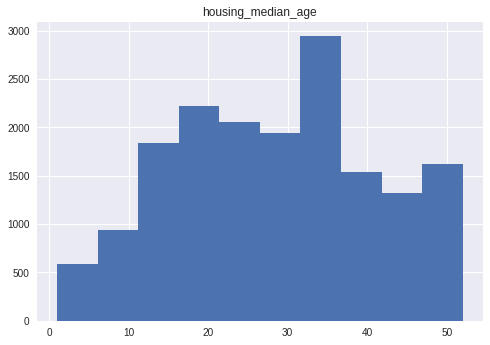

In [6]:
california_housing_dataframe.hist('housing_median_age')

## 访问数据

In [14]:
cities = pd.DataFrame({'City Name': city_names, 'Population':population})
print(type(cities['City Name']))
print(cities['City Name'])

print(type(cities['City Name'][1]))
print(cities['City Name'][1])

print(type(cities[0:2]))
print(cities[0:2])

<class 'pandas.core.series.Series'>
0    San Francisco
1         San Jose
2       Sacramento
Name: City Name, dtype: object
<class 'str'>
San Jose
<class 'pandas.core.frame.DataFrame'>
       City Name  Population
0  San Francisco      852469
1       San Jose     1015785


 此外，*pandas* 针对高级[索引和选择](http://pandas.pydata.org/pandas-docs/stable/indexing.html)提供了极其丰富的 API（数量过多，此处无法逐一列出）。

## 操控数据

In [19]:
population / 1000

import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

 对于更复杂的单列转换，您可以使用 `Series.apply`。像 Python [映射函数](https://docs.python.org/2/library/functions.html#map)一样，`Series.apply` 将以参数形式接受 [lambda 函数](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions)，而该函数会应用于每个值。

下面的示例创建了一个指明 `population` 是否超过 100 万的新 `Series`：

In [0]:
population.apply(lambda val: val > 1000000)

 
`DataFrames` 的修改方式也非常简单。例如，以下代码向现有 `DataFrame` 添加了两个 `Series`：

In [21]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City Name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


## 练习 1

In [28]:
cities['Boole Colum'] = cities['City Name'].apply(lambda val: val.startswith('San')) & cities['Area square miles'].apply(lambda val: val > 50)
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City Name'].apply(lambda name: name.startswith('San'))
cities

,City Name,Population,Area square miles,Population density,Boole Colum,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False,False
1,San Jose,1015785,176.53,5754.177760,True,True
2,Sacramento,485199,97.92,4955.055147,False,False


# 索引

In [33]:
city_names.index

print(cities.index)

RangeIndex(start=0, stop=3, step=1)


In [35]:
cities.reindex(np.random.permutation(cities.index))
print(np.random.permutation(cities.index))

[2 1 0]


In [36]:
cities.reindex([3,2,0])

,City Name,Population,Area square miles,Population density,Boole Colum,Is wide and has saint name
3,NaN,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False,False
0,San Francisco,852469.0,46.87,18187.945381,False,False
